In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
import sklearn
import nltk
# from nltk.stem.porter import PorterStemmer
nltk.download('punkt')
from sklearn import feature_extraction,model_selection
from sklearn.metrics import confusion_matrix
import glob
import os
import string
import tensorflow as tf
import keras as K
import zipfile
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Using TensorFlow backend.


In [0]:
def load_csv(path):
  df=pd.read_csv(path).drop(['Sub-task A','ID'],axis=1)
  df=df[(df['Sub-task B']=="NGEN")|(df['Sub-task B']=='GEN')].dropna()
  df['Sub-task B']=(df['Sub-task B']=='GEN').astype(int)
  return df

In [0]:
train_df=load_csv("/content/drive/My Drive/Minor Project/eng_train.csv")
dev_df=load_csv('/content/drive/My Drive/Minor Project/eng_dev.csv')
print(train_df.head())
print(dev_df.head())

                                                Text  Sub-task B
0                                          Next part           0
1                 Iii8mllllllm\nMdxfvb8o90lplppi0005           0
2  🤣🤣😂😂🤣🤣🤣😂osm vedio ....keep it up...make more v...           0
3  What the fuck was this? I respect shwetabh and...           0
4  Concerned authorities should bring arundathi R...           0
                                                Text  Sub-task B
0        U deserve more subscribers. U really great.           0
1                                     Nice video....           0
2  sorry if i bother somebody.. iam a defence asp...           1
3  Joker was amazing....it was not glamorised !.....           0
4                                          Nice baro           0


In [0]:
train_df.shape,dev_df.shape

((4263, 2), (1066, 2))

In [0]:
print(train_df['Sub-task B'].value_counts())
print(dev_df['Sub-task B'].value_counts())

0    3954
1     309
Name: Sub-task B, dtype: int64
0    993
1     73
Name: Sub-task B, dtype: int64


In [0]:
print(309/4263*100)
print(73/1066*100)

7.248416608022519
6.848030018761726


In [0]:
train_line=train_df['Text'].apply(lambda x: nltk.word_tokenize(x))
dev_line=dev_df['Text'].apply(lambda x: nltk.word_tokenize(x))
dev_line,train_line

(0       [U, deserve, more, subscribers, ., U, really, ...
 1                                   [Nice, video, ..., .]
 2       [sorry, if, i, bother, somebody.., iam, a, def...
 3       [Joker, was, amazing, ..., .it, was, not, glam...
 4                                            [Nice, baro]
                               ...                        
 1061    [Ranu, Mandal, is, third, class, [, woman.No, ...
 1062    [[, 15:23, ], (, https, :, //www.youtube.com/w...
 1063                         [Love, u, bro, keep, it, up]
 1064                               [May, I, help, you, ?]
 1065    [You, are, great, sir, !, !, !, When, a, i, sa...
 Name: Text, Length: 1066, dtype: object,
 0                                            [Next, part]
 1                    [Iii8mllllllm, Mdxfvb8o90lplppi0005]
 2       [🤣🤣😂😂🤣🤣🤣😂osm, vedio, ..., .keep, it, up, ..., ...
 3       [What, the, fuck, was, this, ?, I, respect, sh...
 4       [Concerned, authorities, should, bring, arunda...
              

In [0]:
# tk=Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',lower=True, split=" ")
tk=Tokenizer(lower=True,split=" ")
tk.fit_on_texts(train_line)
word_index=tk.word_index
word_index

{'.': 1,
 'the': 2,
 'is': 3,
 'and': 4,
 ',': 5,
 'to': 6,
 'i': 7,
 'a': 8,
 'of': 9,
 '...': 10,
 'you': 11,
 'in': 12,
 'this': 13,
 'it': 14,
 'are': 15,
 '?': 16,
 'that': 17,
 '!': 18,
 'not': 19,
 'for': 20,
 'movie': 21,
 'like': 22,
 'but': 23,
 'on': 24,
 'be': 25,
 "n't": 26,
 "'s": 27,
 'with': 28,
 'do': 29,
 'so': 30,
 'have': 31,
 'u': 32,
 'kabir': 33,
 'your': 34,
 'was': 35,
 'they': 36,
 'he': 37,
 'she': 38,
 'people': 39,
 'singh': 40,
 'about': 41,
 'who': 42,
 'we': 43,
 'all': 44,
 'as': 45,
 'what': 46,
 ')': 47,
 'from': 48,
 'love': 49,
 'her': 50,
 'review': 51,
 ':': 52,
 'his': 53,
 'if': 54,
 'will': 55,
 '(': 56,
 'video': 57,
 'should': 58,
 'good': 59,
 'can': 60,
 'very': 61,
 '@': 62,
 'or': 63,
 'right': 64,
 'my': 65,
 'by': 66,
 'one': 67,
 'just': 68,
 'no': 69,
 '&': 70,
 'me': 71,
 'india': 72,
 'has': 73,
 'these': 74,
 'bro': 75,
 'nice': 76,
 'movies': 77,
 'watch': 78,
 'why': 79,
 'their': 80,
 'man': 81,
 'sir': 82,
 'only': 83,
 'also':

In [0]:
import math
length=math.ceil(np.average(train_line.apply(lambda x:len(x))))
length

20

In [0]:
def encode_text(tokenizer, lines, length):
  encoded = tokenizer.texts_to_sequences(lines)
  padded = pad_sequences(encoded, maxlen=length, padding='post')
  return padded

In [0]:
train_x=encode_text(tk,train_line,20)
print(train_x)
dev_x=encode_text(tk,dev_line,20)
print(dev_x)

[[  509   325     0 ...     0     0     0]
 [ 3983  3984     0 ...     0     0     0]
 [ 3985  1002    10 ...     0     0     0]
 ...
 [    6  1196   503 ... 10368   470    18]
 [   62 10369 10370 ...     0     0     0]
 [   43   101     6 ...     0     0     0]]
[[ 32 594  85 ...   0   0   0]
 [ 76  57  10 ...   0   0   0]
 [ 56 112   3 ... 672  92  10]
 ...
 [ 49  32  75 ...   0   0   0]
 [301   7 522 ...   0   0   0]
 [ 82  18  18 ...  95   2  21]]


In [0]:
vocab_size = len(tk.word_index)
print(vocab_size)

10370


In [0]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(padded_docs, y, test_size=0.30, random_state=42)

In [0]:
#load pre-trained embedding:
zip_ref = zipfile.ZipFile("/content/drive/My Drive/Minor Project/crawl-300d-2M.vec.zip", 'r')
zip_ref.extractall()
zip_ref.close()
embeddings_index = {}
f = open('/content/crawl-300d-2M.vec', encoding="utf8")
for line in f:
    values = line.split()#This splits each values in a  line with spaces
    word = values[0] # This store the first values which is the word in english
    coefs = np.asarray(values[1:], dtype='float32') # This converts all splitted values from 1 to last(expect first word) into an array
    embeddings_index[word] = coefs # english word = array of numerical values
f.close()
print('Total %s word vectors in crawl-300-2M.' % len(embeddings_index))

Total 1999996 word vectors in crawl-300-2M.


In [0]:
embeddings_index['🤣'].shape

(300,)

In [0]:
# Initialize the weight for each word for the embedding layer. Words not present
# in the dictionary initialized by random value 
EMBEDDING_DIM = 300
embedding_matrix = np.random.random((len(word_index) + 1, EMBEDDING_DIM))
#embedding_matrix = (10370, 300) NOTE: It is from uniques words in our tweets
for word, i in word_index.items(): # Selecting word from our tweet unique words list for changing with the values from glove
    embedding_vector = embeddings_index.get(word) # Finding our tweet words in glove and taking its array of 100 values
    if embedding_vector is not None: 
#words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [0]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(np.asarray(train_df['Sub-task B']))
y_test = to_categorical(np.asarray(dev_df['Sub-task B']))
# y_train=np.array(train_df['Sub-task A'])
# y_dev=np.array(dev_df['Sub-task A'])
print(y_train.shape, y_test.shape)

(4263, 2) (1066, 2)


In [0]:
from keras.utils.vis_utils import plot_model
from keras.models import Sequential
from keras.layers import Input,LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
model=Sequential()
model.add(Embedding(vocab_size,100,input_length=train_x.shape[1]))
model.add(LSTM(192, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 20, 300)           3111300   
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 18, 128)           115328    
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 3, 128)            0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 3, 128)            0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 384)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               98560     
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)              

In [0]:
history=model.fit(train_x, y_train, validation_data = (dev_x, y_test),epochs=100,batch_size=100, verbose=2)



Train on 4263 samples, validate on 1066 samples
Epoch 1/100
 - 7s - loss: 0.3238 - acc: 0.9075 - val_loss: 0.2440 - val_acc: 0.9315
Epoch 2/100
 - 0s - loss: 0.2556 - acc: 0.9275 - val_loss: 0.2336 - val_acc: 0.9315
Epoch 3/100
 - 0s - loss: 0.2343 - acc: 0.9276 - val_loss: 0.2198 - val_acc: 0.9315
Epoch 4/100
 - 0s - loss: 0.2119 - acc: 0.9286 - val_loss: 0.2156 - val_acc: 0.9320
Epoch 5/100
 - 0s - loss: 0.1817 - acc: 0.9333 - val_loss: 0.2087 - val_acc: 0.9287
Epoch 6/100
 - 0s - loss: 0.1584 - acc: 0.9458 - val_loss: 0.2177 - val_acc: 0.9315
Epoch 7/100
 - 0s - loss: 0.1353 - acc: 0.9519 - val_loss: 0.2296 - val_acc: 0.9325
Epoch 8/100
 - 0s - loss: 0.1096 - acc: 0.9602 - val_loss: 0.2183 - val_acc: 0.9268
Epoch 9/100
 - 0s - loss: 0.0907 - acc: 0.9687 - val_loss: 0.2870 - val_acc: 0.9343
Epoch 10/100
 - 0s - loss: 0.0728 - acc: 0.9749 - val_loss: 0.2972 - val_acc: 0.9329
Epoch 11/100
 - 0s - loss: 0.0627 - acc: 0.9808 - val_loss: 0.3333 - val_acc: 0.9343
Epoch 12/100
 - 0s - los

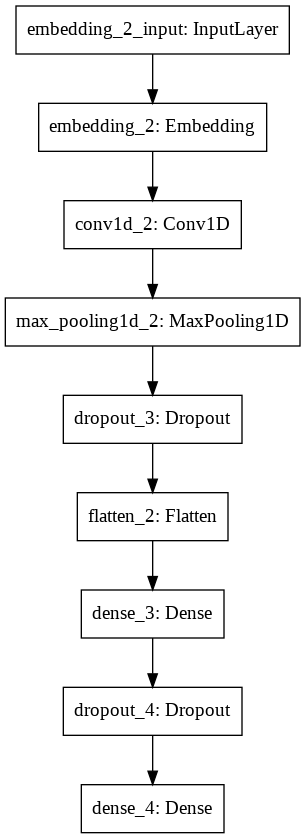

In [0]:
plot_model(model)

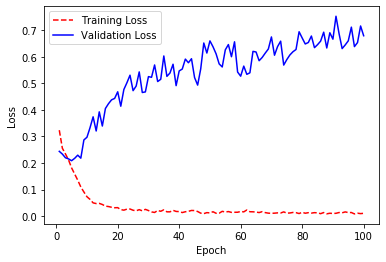

In [0]:
training_loss=history.history['loss']
validation_loss=history.history['val_loss']
epoch_count=range(1,len(training_loss)+1)
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, validation_loss, 'b-')
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [0]:
scores = model.evaluate(dev_x, y_test, verbose=0)
print(scores)

[0.6800581216645012, 0.9329268292682927]


In [0]:
predicting_df = pd.read_csv("/content/drive/My Drive/Minor Project/eng_test.csv")
test_line=predicting_df['Text'].apply(lambda x: nltk.word_tokenize(x))
test_x=encode_text(tk,test_line,length)
test_x, predicting_df.head()

(array([[ 134,   52,  203, ...,    0,    0,    0],
        [ 369,   24,  222, ...,    1,    0,    0],
        [  30,   14,   27, ...,   55,   11,   16],
        ...,
        [  17,   27,   79, ...,    0,    0,    0],
        [   2,  141, 2513, ...,    0,    0,    0],
        [  98,    9,  503, ...,    0,    0,    0]], dtype=int32),
                 ID                                               Text
 0  YoutubeCorpus37        https://www.youtube.com/watch?v=4iejjszkflo
 1            C37.1  shame on society & culture trying to justify t...
 2            C37.2  just wanna say, there is no gay gene. you can ...
 3            C37.3  well, if a one twin struggles with self confid...
 4            C37.4  i am an identical twin and we are both homosex...)

In [0]:
predictions_test = model.predict(test_x)
print(predictions_test)

[[9.9398053e-01 5.5719018e-03]
 [9.9999940e-01 6.5565109e-07]
 [9.9999988e-01 1.7881393e-07]
 ...
 [9.9999976e-01 2.6822090e-07]
 [9.8790443e-01 1.2406588e-02]
 [9.9993348e-01 7.1823597e-05]]


In [0]:
predictions_test1 = np.zeros_like(predictions_test)
predictions_test1[np.arange(len(predictions_test)), predictions_test.argmax(1)] = 1
predictions_test1 = predictions_test1.argmax(1)
predictions_test1 = pd.Series(predictions_test1)
predictions_test1 = predictions_test1.rename("Label")
ps = predicting_df['ID']
ps, predictions_test1

(0       YoutubeCorpus37
 1                 C37.1
 2                 C37.2
 3                 C37.3
 4                 C37.4
              ...       
 1195           C24.47.4
 1196           C24.47.5
 1197             C24.48
 1198             C24.50
 1199           C24.50.1
 Name: ID, Length: 1200, dtype: object, 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 1195    1
 1196    0
 1197    0
 1198    0
 1199    0
 Name: Label, Length: 1200, dtype: int64)

In [0]:
output_df = pd.merge(ps,predictions_test1,how='outer',left_index=True,right_index=True)
output_df['Label'] = output_df['Label'].map({0:'NGEN', 1:'GEN'})
output_df.head()

ID Label
0  YoutubeCorpus37  NGEN
1            C37.1  NGEN
2            C37.2  NGEN
3            C37.3  NGEN
4            C37.4  NGEN

In [0]:
output_df.to_csv("English_TaskB_Run1_LSTM_FastText.csv")

In [0]:
predictions_test = model.predict(dev_x)
predictions_test1 = np.zeros_like(predictions_test)
predictions_test1[np.arange(len(predictions_test)), predictions_test.argmax(1)] = 1

In [0]:
print(sklearn.metrics.classification_report(y_dev, predictions_test1, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       993
           1       0.54      0.18      0.27        73

    accuracy                           0.93      1066
   macro avg       0.74      0.58      0.62      1066
weighted avg       0.91      0.93      0.92      1066

